## Exam vB, PROBLEM 1

### Part 1

In [1]:
import numpy as np

def f_x(x):
    """
    PDF f(x) as defined by the problem.
    """
    if x <= 0 or x >= 1:
        return 0
    return (2 * x * np.exp(x**2 - 1)) / np.exp(-1)

def problem1_inversion(n_samples=1):
    """
    Use rejection sampling to generate samples from the given distribution.

    Parameters:
    n_samples (int): Number of samples to generate.

    Returns:
    np.ndarray: Array of samples.
    """
    samples = []
    c = 2  # Chosen constant to satisfy c * g(x) >= f(x) for all x in [0, 1]

    while len(samples) < n_samples:
        # Step 1: Sample from proposal distribution g(x) (uniform on [0, 1])
        x_candidate = np.random.uniform(0, 1)
        
        # Step 2: Sample u from Uniform[0, 1] for acceptance check
        u = np.random.uniform(0, 1)

        # Step 3: Accept or reject
        if u <= f_x(x_candidate) / c:
            samples.append(x_candidate)

    return np.array(samples)

### Part 2

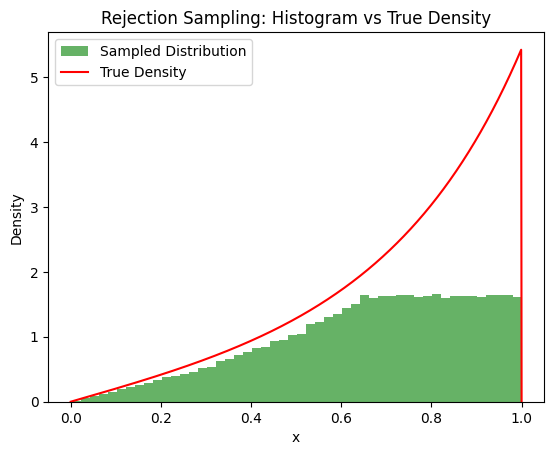

In [2]:
# Part 2: Generate 100,000 samples and plot histogram
import matplotlib.pyplot as plt

problem1_samples = problem1_inversion(n_samples=100000)

# Plot histogram of samples
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color='g', label='Sampled Distribution')

# Plot true density
x = np.linspace(0, 1, 1000)
y = [f_x(xi) for xi in x]
plt.plot(x, y, 'r-', label='True Density')

plt.title("Rejection Sampling: Histogram vs True Density")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

### Part 3

In [3]:
# Part 3: Compute the integral using the generated samples
def integrand(x):
    return np.sin(x) * (2 * np.exp(x**2) / np.exp(-1))

weights = [integrand(xi) / f_x(xi) if f_x(xi) > 0 else 0 for xi in problem1_samples]
problem1_integral = np.mean(weights)

print(f"Approximate value of the integral: {problem1_integral}")

Approximate value of the integral: 2.5030227744122566


### Part 4

In [4]:
# Part 4: Compute 95% confidence interval using Hoeffding's inequality
a, b = min(weights), max(weights)  # Determine bounds for weights
epsilon = (b - a) * np.sqrt(np.log(2 / 0.05) / (2 * len(problem1_samples)))
problem1_interval = (problem1_integral - epsilon, problem1_integral + epsilon)

print(f"Approximate value of the integral: {problem1_integral}")
print(f"95% confidence interval: {problem1_interval}")

Approximate value of the integral: 2.5030227744122566
95% confidence interval: (2.5011721057843035, 2.5048734430402098)


### Part 5

In [5]:
def problem1_inversion_2(n_samples=1):
    """
    Use rejection sampling to generate samples from the given distribution.

    F[x] =
    0, x <= 0
    20x * e^(20 - 1/x), 0 < x < 1/20
    1, x >= 1/20

    Parameters:
    n_samples (int): Number of samples to generate.

    Returns:
    np.ndarray: Array of samples.
    """
    def target_pdf(x):
        if x <= 0 or x >= 1 / 20:
            return 0
        return 20 * x * np.exp(20 - 1 / x)

    # Proposal distribution: exponential with lambda = 20 (adjusted for efficiency)
    def proposal_pdf(x):
        return 20 * np.exp(-20 * x) if x > 0 else 0

    def sample_proposal():
        return np.random.exponential(1 / 20)

    samples = []
    c = 10  # Chosen constant to satisfy c * g(x) >= f(x) for all x in (0, 1/20)

    while len(samples) < n_samples:
        # Step 1: Sample from the proposal distribution
        x_candidate = sample_proposal()

        # Reject if out of bounds
        if x_candidate >= 1 / 20:
            continue

        # Step 2: Sample u from Uniform[0, 1] for acceptance check
        u = np.random.uniform(0, 1)

        # Step 3: Accept or reject
        if u <= target_pdf(x_candidate) / (c * proposal_pdf(x_candidate)):
            samples.append(x_candidate)

    return np.array(samples)
